# Анализ данных сервиса "Самокаты" от Т-банка (01.04.2024 - 31.10.2024)
- Автор: Новикова Полина
- Дата: 12.11.2025

### Цель проекта 
Провести исследовательский анализ данных сервиса "Самокаты" от Т-банка для выявления факторов, влияющих на изменение пользовательского спроса в период с апреля по октябрь 2024 года.

### Описание данных
Для проведения анализа будут использованы следующие данные:
- `order_rk` - Идентификатор заказа (поездки).
- `party_rk` - Идентификатор клиента.
- `gender_cd` - Пол клиента.
- `age` - Возраст клиента
- `education_level_cd` - Уровень образования клиента (SCH — начальное, среднее; GRD — высшее; UGR — неполное высшее; PGR — два высших; ACD — ученая степень).
- `marital_status_cd` - Семейный статус человека (IMR — состоит в незарегистрированном браке; MAR —женат/замужем; DLW — не проживает с супругом(ой); OMR — состоит в зарегистрированном браке; CIV — гражданский брак; UNM — холост/не замужем; DIV — разведен(а); FAL — никогда не состоял(а) в браке; WID — вдовец/вдова)
- `lvn_state_nm` - Регион проживания человека.
- `minute_cost` - Стоимость минуты.
- `activation_cost`- Стоимость активации.
- `hold_amount` - Размер суммы, которая замораживается на счете в момент взятия самоката.
- `transport_model` - Название модели самоката.
- `distance_km` - Километраж поездки.
- `created_dttm` - Дата и время создания заказа.
- `book_start_dttm` - Дата и время начала поездки.
- `book_end_dttm` - Дата и время завершения поездки.
- `book_time_zone_cd` - Часовой пояс.
- `local_book_start_dttm` - Дата и время начала поездки в часовом поясе человека,который брал самокат.
- `nominal_price_rub_amt` - Стоимость поездки.
- `loyalty_accrual_rub_amt` - Размер выплаченного кэшбэка в рублях.
- `loyalty_accrual_bns_amt` - Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты).

### Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных и подготовка их к исследованию.
3. Исследовательский анализ данных.
4. Статистический анализ данных и формулировка гипотез.
5. Доля Т-банка на рынке кикшеринга. 


---

## Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
#Перестраховка
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Сохраняем в датафрейм
df = pd.read_csv('https://dano.hse.ru/mirror/pubs/share/987942268.csv')

In [3]:
display(df.head())
df.info()
#Проверка периода дат в заказах
print(f"Минимальная дата в заказах: {df['created_dttm'].min()}")
print(f"Максимальная дата в заказах: {df['created_dttm'].max()}")

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [4]:
# Проверка на пропуски
print("\nПропуски в df:")
print(df.isnull().sum())


Пропуски в df:
order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64


**После первичного анализа данных можно сделать следующие выводы:**

`df` содержит 20 столбцов и 396749 строк.
 
- Изменить тип данных стоит а столбцах, где указана дата - это  `created_dttm`,`book_start_dttm`,`book_end_dttm`,`local_book_start_dttm` (с object на datetime64[ns]).
- Пропуски содержатся в столбцах: `gender_cd`, `education_level_cd`, `marital_status_cd`, `lvn_state_nm`, `loyalty_accrual_rub_amt`, `loyalty_accrual_bns_amt`. 

## Предобработка данных и подготовка их к исследованию.

In [5]:
# Преобразовываем данные к datetime64[ns]
df[['created_dttm','book_start_dttm','book_end_dttm','local_book_start_dttm']] = df[['created_dttm','book_start_dttm','book_end_dttm','local_book_start_dttm']].astype('datetime64[ns]')
# Проверяем 
print(df[['created_dttm','book_start_dttm','book_end_dttm','local_book_start_dttm']].dtypes)

created_dttm             datetime64[ns]
book_start_dttm          datetime64[ns]
book_end_dttm            datetime64[ns]
local_book_start_dttm    datetime64[ns]
dtype: object


С помощью метода info() определили,что есть пропуски. Поэтому стоит проанализировать процент пустых значений со всеми остальными значениями.

In [6]:
# Применяем метод isna() к датафрейму 
df_isna = df.isna().sum().sort_values(ascending = False)
# Подсчитываем процент строк с пропусками
round((df_isna / df.shape[0] * 100), 2)

loyalty_accrual_bns_amt    94.47
education_level_cd         52.10
marital_status_cd          45.12
lvn_state_nm                8.61
loyalty_accrual_rub_amt     7.50
gender_cd                   0.74
created_dttm                0.00
nominal_price_rub_amt       0.00
local_book_start_dttm       0.00
book_time_zone_cd           0.00
book_end_dttm               0.00
book_start_dttm             0.00
order_rk                    0.00
distance_km                 0.00
party_rk                    0.00
hold_amount                 0.00
activation_cost             0.00
minute_cost                 0.00
age                         0.00
transport_model             0.00
dtype: float64

Вероятные причины и что следует сделать:
- `loyalty_accrual_bns_amt` (94,47%) - пропуски могут означать отсутствие участия в бонусной программе, возможно пользователи мало расплачиваются кредитной картой. В данном случае лучше использовать значение-индикатор, а именно 0.
- `education_level_cd` (52,10%), `marital_status_cd` (45,12%), `lvn_state_nm` (8,61%) - возможны проблемы сбора персональных данных.Замена с помощью значения-индикатора, в данном случае 'UNKNOWN'.
- `loyalty_accrual_rub_amt` (7,5%) - отстутвие кэшбека в рублях, так как скорее всего это те пользователи которые расплачиваются кредитной картой или отсутвуют в бонусной программе. Здесь также стоит заменить пропуски 0.
-`gender_cd`(0,74%), также возможны проблемы сбора персональных данных.Замена с помощью значения-индикатора, в данном случае 'UNKNOWN'.

In [7]:
# Проверка, совпадают ли пропуски в рублях и бонусах
mask = df['loyalty_accrual_rub_amt'].isna() & df['loyalty_accrual_bns_amt'].isna()
print(f"Совпадающие пропуски: {mask.sum()}")

Совпадающие пропуски: 7813


**7813** совпадающих пропусков означает, что для этих наблюдений отсутствуют оба показателя лояльности одновременно. Это подтверждает гипотезу о том, что пропуски в `loyalty_accrual_rub_amt` и `loyalty_accrual_bns_amt` скорее всего означают отсутствие участия в программе лояльности.
Это не случайные пропуски, а системная особенность

In [8]:
# Замена с помощью 0
df[['loyalty_accrual_rub_amt','loyalty_accrual_bns_amt']] = df[['loyalty_accrual_rub_amt','loyalty_accrual_bns_amt']].fillna(0)

In [9]:
# Замена с помощью значения-индикатора, в данном случае 'UNKNOWN'
columns_to_fill = ['education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'gender_cd']
for col in columns_to_fill:
    df[col] = df[col].fillna('UNKNOWN')

In [10]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                396749 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       396749 non-null  object        
 5   marital_status_cd        396749 non-null  object        
 6   lvn_state_nm             396749 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [11]:
# Проверка полных дубликатов
full_duplicates = df.duplicated().sum()
print(f"Полные дубликаты: {full_duplicates}")

# Показать дубликаты
df_duplicates = df[df.duplicated(keep=False)]
print(f"Количество строк с дубликатами: {len(df_duplicates)}")

Полные дубликаты: 0
Количество строк с дубликатами: 0


In [12]:
# Проверим неявные дубликаты

# Проверяем наличие неявных дубликатов в gender_cd
print("\n1. Уникальные значения в gender_cd:")
unique_gender = df['gender_cd'].unique()
print(unique_gender)
print(f"Количество уникальных значений: {len(unique_gender)}")

# Проверяем наличие неявных дубликатов в education_level_cd
print("\n2. Уникальные значения в education_level_cd:")
unique_education = df['education_level_cd'].unique()
print(unique_education)
print(f"Количество уникальных значений: {len(unique_education)}")

# Проверяем наличие неявных дубликатов в marital_status_cd
print("\n3. Уникальные значения в marital_status_cd:")
unique_marital = df['marital_status_cd'].unique()
print(unique_marital)
print(f"Количество уникальных значений: {len(unique_marital)}")

# Проверяем наличие неявных дубликатов в transport_model
print("\n4. Уникальные значения в transport_model:")
unique_transport = df['transport_model'].unique()
print(unique_transport)
print(f"Количество уникальных значений: {len(unique_transport)}")


1. Уникальные значения в gender_cd:
['M' 'F' 'UNKNOWN']
Количество уникальных значений: 3

2. Уникальные значения в education_level_cd:
['UGR' 'GRD' 'UNKNOWN' 'SCH' 'PGR' 'ACD']
Количество уникальных значений: 6

3. Уникальные значения в marital_status_cd:
['DIV' 'MAR' 'UNM' 'UNKNOWN' 'CIV' 'WID']
Количество уникальных значений: 6

4. Уникальные значения в transport_model:
['SL' 'E' 'ES100' 'Max' 'Urban E-Bike' 'ES400' 'ES' 'ES200' 'ES-08S'
 'Techno' 'MK' 'LB' 'Lucky' 'B1D']
Количество уникальных значений: 14


In [13]:
# Проверим неявные дубликаты в названиях регионов
# ПЕРВЫЙ ЭТАП: Анализ исходных данных
print("=== ПЕРВЫЙ ЭТАП: Анализ исходных данных ===")
print("Уникальные значения в lvn_state_nm ДО нормализации:")
unique_lvn_state_nm_before = df['lvn_state_nm'].unique()
print(unique_lvn_state_nm_before)
print(f"\nКоличество уникальных регионов ДО нормализации: {len(unique_lvn_state_nm_before)}")
print(f"Общее количество записей: {len(df)}")

=== ПЕРВЫЙ ЭТАП: Анализ исходных данных ===
Уникальные значения в lvn_state_nm ДО нормализации:
['ТЮМЕНСКАЯ ОБЛ' 'РОСТОВСКАЯ ОБЛ' 'СВЕРДЛОВСКАЯ ОБЛ' 'Г МОСКВА' 'МОСКВА'
 'РЕСП ТАТАРСТАН' 'НОВОСИБИРСКАЯ ОБЛ' 'ЧЕЛЯБИНСКАЯ ОБЛ' 'UNKNOWN'
 'НИЖЕГОРОДСКАЯ ОБЛ' 'КРАСНОДАРСКИЙ КРАЙ' 'МОСКОВСКАЯ ОБЛ'
 'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС' 'КРАСНОЯРСКИЙ КРАЙ' 'СМОЛЕНСКАЯ ОБЛ'
 'ИРКУТСКАЯ ОБЛ' 'ОРЛОВСКАЯ ОБЛ' 'Г САНКТ-ПЕТЕРБУРГ' 'РЕСП БАШКОРТОСТАН'
 'ПСКОВСКАЯ ОБЛ' 'ВОЛОГОДСКАЯ ОБЛ' 'РЕСП МАРИЙ ЭЛ' 'ВОРОНЕЖСКАЯ ОБЛ'
 'САМАРСКАЯ ОБЛ' 'АСТРАХАНСКАЯ ОБЛ' 'БЕЛГОРОДСКАЯ ОБЛ' 'АЛТАЙСКИЙ КРАЙ'
 'ЛИПЕЦКАЯ ОБЛ' 'САРАТОВСКАЯ ОБЛ' 'ЛЕНИНГРАДСКАЯ ОБЛ' 'ПЕРМСКИЙ КРАЙ'
 'САХАЛИНСКАЯ ОБЛ' 'РЕСП УДМУРТСКАЯ' 'РЕСП КРЫМ' 'КАЛИНИНГРАДСКАЯ ОБЛ'
 'ТВЕРСКАЯ ОБЛ' 'СТАВРОПОЛЬСКИЙ КРАЙ' 'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ'
 'УДМУРТСКАЯ РЕСП' 'ИВАНОВСКАЯ ОБЛ'
 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО' 'ПРИМОРСКИЙ КРАЙ'
 'ВОЛГОГРАДСКАЯ ОБЛ' 'Г СЕВАСТОПОЛЬ' 'ТОМСКАЯ ОБЛ' 'РЕСП ЧЕЧЕНСКАЯ'
 'САНКТ-ПЕТЕРБУРГ' 'РЕСП БУРЯТИЯ' 'РЕСП ДА

In [14]:
# ВТОРОЙ ЭТАП: Комплексная нормализация
def comprehensive_region_normalization(region):
    """
    Комплексная нормализация названий регионов
    """
    # 1. Базовая проверка на пропуски и UNKNOWN
    if pd.isna(region) or region == 'UNKNOWN':
        return 'UNKNOWN'
    
    region = str(region).upper().strip()
    
    # 2. Исправление опечаток
    typo_fixes = {'НИЖЕГСКАЯ': 'НИЖЕГОРОДСКАЯ',
        'БЕЛГСКАЯ': 'БЕЛГОРОДСКАЯ', 
        'НОВГСКАЯ': 'НОВГОРОДСКАЯ',
        'МОСККОВСКАЯ': 'МОСКОВСКАЯ',
        'ЛЕНЕНГРАДСКАЯ': 'ЛЕНИНГРАДСКАЯ',
    }
    
    # Заменяем только полные совпадения для опечаток
    for typo, correct in typo_fixes.items():
        if region == typo or region == typo + ' ОБЛ':
            region = correct + ' ОБЛ'
    
    # 3. Обработка Москвы и Санкт-Петербурга
    if 'МОСКВА' in region:
        if any(x in region for x in ['ОБЛ', 'ОБЛАСТЬ', 'МОСКОВСКАЯ']):
            return 'МОСКОВСКАЯ ОБЛ'
        else:
            return 'МОСКВА'
    if any(x in region for x in ['САНКТ-ПЕТЕРБУРГ', 'ПЕТЕРБУРГ']):
        if any(x in region for x in ['ОБЛ', 'ОБЛАСТЬ', 'ЛЕНИНГРАД']):
            return 'ЛЕНИНГРАДСКАЯ ОБЛ'
        else:
            return 'САНКТ-ПЕТЕРБУРГ'
    
    # 4. Стандартизация форматов
    region = (region.replace('РЕСПУБЛИКА', 'РЕСП')
                  .replace('ОБЛАСТЬ', 'ОБЛ')
                  .replace('КРАЙ', 'КРАЙ')
                  .replace('Г.', 'Г')
                  .replace('ГОРОД', 'Г')
                  .replace('ОБЛ.', 'ОБЛ')
                  .replace('АОБЛ', 'АО'))
    
    # 5. Стандартизация порядка слов (ОБЛ всегда в конце)
    if region.startswith('ОБЛ '):
        parts = region.split(' ')
        if len(parts) >= 2:
            region = ' '.join(parts[1:]) + ' ОБЛ'
            
    # 6. Убираем дублирование "ОБЛ"
    if 'ОБЛ ОБЛ' in region:
        region = region.replace('ОБЛ ОБЛ', 'ОБЛ')
    
    # 7. Стандартизация сложных названий
    if 'КУЗБАСС' in region:
        return 'КЕМЕРОВСКАЯ ОБЛ'
    
    # 8. Стандартизация республик
    republic_mapping = {
        'ТАТАРСТАН': 'РЕСП ТАТАРСТАН',
        'ТАТАРСТАН РЕСП': 'РЕСП ТАТАРСТАН', 
        'РЕСП. ТАТАРСТАН': 'РЕСП ТАТАРСТАН',
        'РУСП ТАТАРСТАН': 'РЕСП ТАТАРСТАН',
        'РЕСПУБЛИКА ТАТАРСТАН': 'РЕСП ТАТАРСТАН',
        'РЕСП ТАТАРСТАН (ТАТАРСТАН)': 'РЕСП ТАТАРСТАН',
        'БАШКОРТОСТАН РЕСП': 'РЕСП БАШКОРТОСТАН',
        'УДМУРТСКАЯ': 'УДМУРТСКАЯ РЕСП',
        'РЕСП УДМУРТСКАЯ': 'УДМУРТСКАЯ РЕСП',
        'РЕСП ДОНЕЦКАЯ НАРОДНАЯ': 'ДОНЕЦКАЯ НАРОДНАЯ РЕСП',
        'РЕСП ЛУГАНСКАЯ НАРОДНАЯ': 'ЛУГАНСКАЯ НАРОДНАЯ РЕСП',
        'ЛНР': 'ЛУГАНСКАЯ НАРОДНАЯ РЕСП',
        'РЕСП САХА /ЯКУТИЯ/': 'РЕСП САХА(ЯКУТИЯ)',
        'САХА /ЯКУТИЯ/': 'РЕСП САХА(ЯКУТИЯ)',
        'РЕСП КАБАРДИНО-БАЛКАРСКАЯ': 'КАБАРДИНО-БАЛКАРСКАЯ РЕСП',
        'РЕСП ЧЕЧЕНСКАЯ': 'ЧЕЧЕНСКАЯ РЕСП',
    }
    
    if region in republic_mapping:
        return republic_mapping[region]
    
    # 9. Автономные округа
    if 'ХАНТЫ-МАНСИЙСКИЙ' in region:
        return 'ХАНТЫ-МАНСИЙСКИЙ АО'
    
    if region in ['АО ЯМАЛО-НЕНЕЦКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ АО']:
        return 'ЯМАЛО-НЕНЕЦКИЙ АО'
    
    if region in ['ЕВРЕЙСКАЯ АОБЛ', 'АОБЛ ЕВРЕЙСКАЯ', 'АО ЕВРЕЙСКАЯ']:
        return 'ЕВРЕЙСКАЯ АО'
    
    if region == 'НЕНЕЦКИЙ АО':
        return 'НЕНЕЦКИЙ АО'
    
    # 10. Города
    city_mapping = {
        'Г СЕВАСТОПОЛЬ': 'СЕВАСТОПОЛЬ',
        'Г БАЙКОНУР': 'БАЙКОНУР', 
        'Г САМАРА': 'САМАРА',
        'Г ЗЕЛЕНОГРАД': 'ЗЕЛЕНОГРАД',
        'САМАРА': 'САМАРА',
        'ЗЕЛЕНОГРАД': 'ЗЕЛЕНОГРАД',
    }
    
    if region in city_mapping:
        return city_mapping[region]
    
    # 11. Сложные случаи
    special_cases = {
        'ЧУВАШСКАЯ РЕСП ЧУВАШИЯ': 'ЧУВАШСКАЯ РЕСП - ЧУВАШИЯ',
        'ЧУВАШИЯ ЧУВАШСКАЯ РЕСП -': 'ЧУВАШСКАЯ РЕСП - ЧУВАШИЯ',
        'НИЖЕГСКАЯ': 'НИЖЕГОРОДСКАЯ ОБЛ',
        'НИЖЕГСКАЯ ОБЛ': 'НИЖЕГОРОДСКАЯ ОБЛ',
        'БЕЛГСКАЯ ОБЛ': 'БЕЛГОРОДСКАЯ ОБЛ',
        'НОВОЗЫБКОВСКАЯ ОБЛ': 'БРЯНСКАЯ ОБЛ',
        'НОВГСКАЯ ОБЛ': 'НОВГОРОДСКАЯ ОБЛ',
        'НОВОСИБИРСКАЯ': 'НОВОСИБИРСКАЯ ОБЛ',
        'СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛ',
        'МОСКОВСКАЯ': 'МОСКОВСКАЯ ОБЛ',
        'МО ЗАПАД': 'МОСКОВСКАЯ ОБЛ',
        'МОГИЛЁВСКАЯ': 'МОГИЛЕВСКАЯ ОБЛ',
        'КРАЙ КРАСНОДАРСКИЙ': 'КРАСНОДАРСКИЙ КРАЙ',
        'КРАЙ ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
        'КРАЙ АЛТАЙСКИЙ': 'АЛТАЙСКИЙ КРАЙ',
        'КРАЙ КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ',
        'КРАЙ КАМЧАТСКИЙ': 'КАМЧАТСКИЙ КРАЙ',
        'КРАЙ СТАВРОПОЛЬСКИЙ': 'СТАВРОПОЛЬСКИЙ КРАЙ',
        'КРАЙ ХАБАРОВСКИЙ': 'ХАБАРОВСКИЙ КРАЙ',
        'КРАЙ ПРИМОРСКИЙ': 'ПРИМОРСКИЙ КРАЙ',
    }
    
    if region in special_cases:
        return special_cases[region]
    
    # 12. Финальная очистка пробелов
    region = ' '.join(region.split())
    
    return region

# Сохраняем результат в исходный столбец
df['lvn_state_nm'] = df['lvn_state_nm'].apply(comprehensive_region_normalization)

In [15]:
# ТРЕТИЙ ЭТАП: Анализ результатов
print("Уникальные значения в lvn_state_nm ПОСЛЕ нормализации:")
unique_lvn_state_nm_after = df['lvn_state_nm'].unique()
print(unique_lvn_state_nm_after)
print(f"\nКоличество уникальных регионов ПОСЛЕ нормализации: {len(unique_lvn_state_nm_after)}")

Уникальные значения в lvn_state_nm ПОСЛЕ нормализации:
['ТЮМЕНСКАЯ ОБЛ' 'РОСТОВСКАЯ ОБЛ' 'СВЕРДЛОВСКАЯ ОБЛ' 'МОСКВА'
 'РЕСП ТАТАРСТАН' 'НОВОСИБИРСКАЯ ОБЛ' 'ЧЕЛЯБИНСКАЯ ОБЛ' 'UNKNOWN'
 'НИЖЕГОРОДСКАЯ ОБЛ' 'КРАСНОДАРСКИЙ КРАЙ' 'МОСКОВСКАЯ ОБЛ'
 'КЕМЕРОВСКАЯ ОБЛ' 'КРАСНОЯРСКИЙ КРАЙ' 'СМОЛЕНСКАЯ ОБЛ' 'ИРКУТСКАЯ ОБЛ'
 'ОРЛОВСКАЯ ОБЛ' 'САНКТ-ПЕТЕРБУРГ' 'РЕСП БАШКОРТОСТАН' 'ПСКОВСКАЯ ОБЛ'
 'ВОЛОГОДСКАЯ ОБЛ' 'РЕСП МАРИЙ ЭЛ' 'ВОРОНЕЖСКАЯ ОБЛ' 'САМАРСКАЯ ОБЛ'
 'АСТРАХАНСКАЯ ОБЛ' 'БЕЛГОРОДСКАЯ ОБЛ' 'АЛТАЙСКИЙ КРАЙ' 'ЛИПЕЦКАЯ ОБЛ'
 'САРАТОВСКАЯ ОБЛ' 'ЛЕНИНГРАДСКАЯ ОБЛ' 'ПЕРМСКИЙ КРАЙ' 'САХАЛИНСКАЯ ОБЛ'
 'УДМУРТСКАЯ РЕСП' 'РЕСП КРЫМ' 'КАЛИНИНГРАДСКАЯ ОБЛ' 'ТВЕРСКАЯ ОБЛ'
 'СТАВРОПОЛЬСКИЙ КРАЙ' 'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ' 'ИВАНОВСКАЯ ОБЛ'
 'ХАНТЫ-МАНСИЙСКИЙ АО' 'ПРИМОРСКИЙ КРАЙ' 'ВОЛГОГРАДСКАЯ ОБЛ' 'СЕВАСТОПОЛЬ'
 'ТОМСКАЯ ОБЛ' 'ЧЕЧЕНСКАЯ РЕСП' 'РЕСП БУРЯТИЯ' 'РЕСП ДАГЕСТАН'
 'КУРГАНСКАЯ ОБЛ' 'КАБАРДИНО-БАЛКАРСКАЯ РЕСП' 'КИРОВСКАЯ ОБЛ'
 'ЯМАЛО-НЕНЕЦКИЙ АО' 'ТАМБОВСКАЯ ОБЛ' 'КУРСКАЯ ОБЛ' 'ОРЕНБУРГС

In [16]:
# ЧЕТВЕРТЫЙ ЭТАП: Итоговая статистика
reduction = len(unique_lvn_state_nm_before) - len(unique_lvn_state_nm_after)
reduction_percent = (reduction / len(unique_lvn_state_nm_before)) * 100

print(f"Уникальных регионов ДО нормализации: {len(unique_lvn_state_nm_before)}")
print(f"Уникальных регионов ПОСЛЕ нормализации: {len(unique_lvn_state_nm_after)}")
print(f"Сокращение: {reduction} дубликатов устранено ({reduction_percent:.1f}%)")

Уникальных регионов ДО нормализации: 213
Уникальных регионов ПОСЛЕ нормализации: 102
Сокращение: 111 дубликатов устранено (52.1%)


Для дальнейшего анализа, проверим стоимость поездки на анамальность значений.

In [17]:
print(df['nominal_price_rub_amt'].describe())

# Дополнительные метрики
print(f"\nДополнительные метрики:")
print(f"Медиана: {df['nominal_price_rub_amt'].median():.2f}")
print(f"Стандартное отклонение: {df['nominal_price_rub_amt'].std():.2f}")
print(f"Коэффициент вариации: {(df['nominal_price_rub_amt'].std() / df['nominal_price_rub_amt'].mean() * 100):.2f}%")

count    396749.000000
mean        127.647694
std         100.122365
min           0.000000
25%          80.840000
50%         103.940000
75%         142.100000
max        5627.640000
Name: nominal_price_rub_amt, dtype: float64

Дополнительные метрики:
Медиана: 103.94
Стандартное отклонение: 100.12
Коэффициент вариации: 78.44%


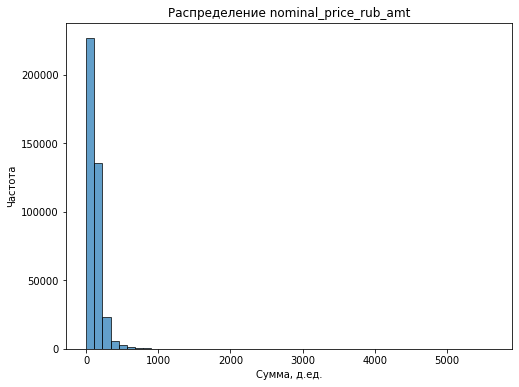

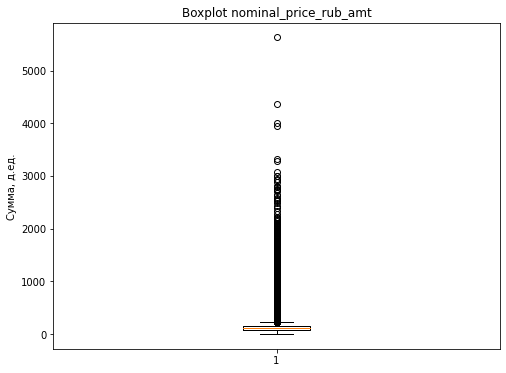

In [18]:
# Гистограмма
plt.figure(figsize=(8, 6))
plt.hist(df['nominal_price_rub_amt'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение nominal_price_rub_amt')
plt.xlabel('Сумма, д.ед.')
plt.ylabel('Частота')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['nominal_price_rub_amt'])
plt.title('Boxplot nominal_price_rub_amt')
plt.ylabel('Сумма, д.ед.')
plt.show()

Промежуточные выводы:

- Высокий коэффициент вариации (78.44%) - данные очень разбросаны
- Сильный разброс: min=0, max=5627 при медиане 104 руб
- Правое смещение: среднее (127) > медиана (104) - есть выбросы вправо
- Большой разброс между квартилями: Q1=81, Q3=142

Принято решение об определении верхней границы по 99-му процентилю.

Количество выбросов в nominal_price_rub_amt: 3963
Верхняя граница (99-й процентиль): 526.47 руб

Описательные статистики по nominal_price_rub_amt (после фильтрации выбросов):
count    392786.000000
mean        121.234139
std          70.150580
min           0.000000
25%          79.960000
50%         103.520000
75%         140.330000
max         526.470000
Name: nominal_price_rub_amt, dtype: float64


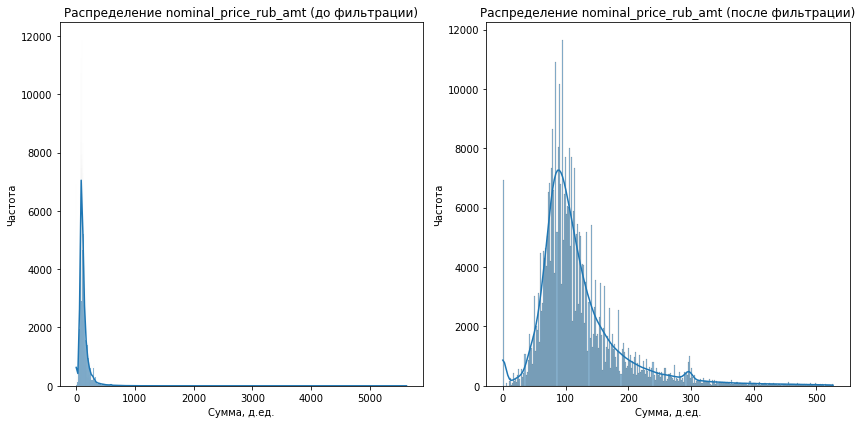


Информация о выбросах:
Максимальное значение среди выбросов: 5627.64 руб
Минимальное значение среди выбросов: 526.72 руб
Среднее значение среди выбросов: 763.32 руб


In [19]:
# Выбросы в nominal_price_rub_amt
# Создаем копию данных для безопасной работы
price_data = df['nominal_price_rub_amt'].copy()

# Функция для определения верхней границы по 99-му процентилю
def find_outliers(series):
    perc_99 = series.quantile(0.99)
    return perc_99

# Определение верхней границы
upper_limit = find_outliers(price_data)

# Проверка на наличие выбросов перед фильтрацией
num_outliers = price_data[price_data > upper_limit].shape[0]

print(f"Количество выбросов в nominal_price_rub_amt: {num_outliers}")
print(f"Верхняя граница (99-й процентиль): {upper_limit:.2f} руб")

# Функция для фильтрации выбросов
def filter_outliers(df, upper_limit, price_column):
    return df[df[price_column] <= upper_limit]

# Фильтрация выбросов (создаем копию для безопасной работы)
df_filtered = df.copy()

# Фильтрация и вывод статистики
if num_outliers > 0:
    # Фильтруем выбросы
    df_filtered = filter_outliers(df_filtered, upper_limit, 'nominal_price_rub_amt')
    
    print("\nОписательные статистики по nominal_price_rub_amt (после фильтрации выбросов):")
    print(df_filtered['nominal_price_rub_amt'].describe())

    # Визуализация распределения (до и после фильтрации)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(price_data, kde=True)
    plt.title('Распределение nominal_price_rub_amt (до фильтрации)')
    plt.xlabel('Сумма, д.ед.')
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    sns.histplot(df_filtered['nominal_price_rub_amt'].dropna(), kde=True)
    plt.title('Распределение nominal_price_rub_amt (после фильтрации)')
    plt.xlabel('Сумма, д.ед.')
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()
    
    # Дополнительная информация о выбросах
    print(f"\nИнформация о выбросах:")
    outliers_data = price_data[price_data > upper_limit]
    print(f"Максимальное значение среди выбросов: {outliers_data.max():.2f} руб")
    print(f"Минимальное значение среди выбросов: {outliers_data.min():.2f} руб")
    print(f"Среднее значение среди выбросов: {outliers_data.mean():.2f} руб")
    
else:
    print("Выбросы в nominal_price_rub_amt не обнаружены, фильтрация не требуется.")
    print("\nОписательные статистики по nominal_price_rub_amt (фильтрация не производилась):")
    print(price_data.describe())

Краткий вывод по результатам фильтрации выбросов:
1. Успешно устранены экстремальные выбросы:
- Максимальная цена снижена с 5627 руб до 526 руб
- Удалено 3963 записи (1% данных)
2. Улучшение качества данных:
- Стандартное отклонение уменьшилось на 30% (с 100.12 до 70.15)
- Коэффициент вариации снизился с 78.44% до ~58%
- Средняя цена изменилась незначительно: 127.65 → 121.23 руб

Распределение цен стало более стабильным, при этом сохранена основная структура данных (медиана практически не изменилась).

Аналогично рассмотрим выбросы по расстояниям поездок.

count    396749.000000
mean          3.681031
std         141.862349
min           0.000000
25%           0.941054
50%           1.729883
75%           3.063694
max       56012.640308
Name: distance_km, dtype: float64

Дополнительные метрики:
Медиана: 1.73
Стандартное отклонение: 141.86
Коэффициент вариации: 3853.88%


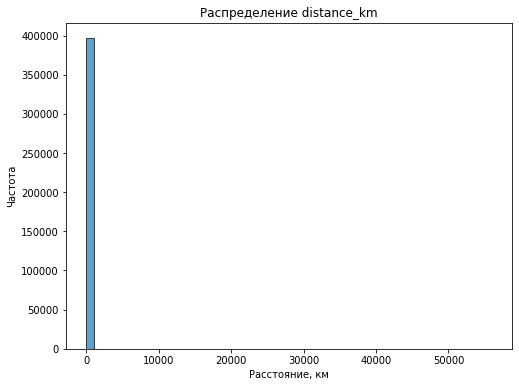

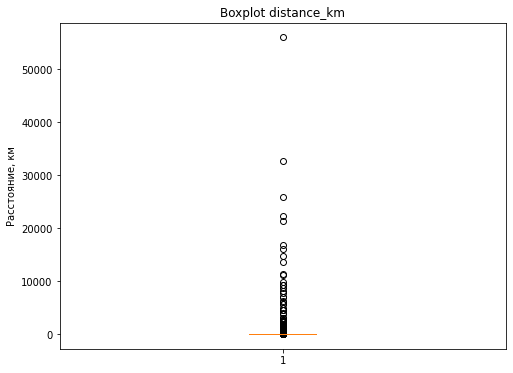

In [20]:
# Анализ столбца distance_km
print(df['distance_km'].describe())

# Дополнительные метрики
print(f"\nДополнительные метрики:")
print(f"Медиана: {df['distance_km'].median():.2f}")
print(f"Стандартное отклонение: {df['distance_km'].std():.2f}")
print(f"Коэффициент вариации: {(df['distance_km'].std() / df['distance_km'].mean() * 100):.2f}%")

# Гистограмма
plt.figure(figsize=(8, 6))
plt.hist(df['distance_km'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение distance_km')
plt.xlabel('Расстояние, км')
plt.ylabel('Частота')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['distance_km'])
plt.title('Boxplot distance_km')
plt.ylabel('Расстояние, км')
plt.show()

Количество выбросов в distance_km: 3968
Верхняя граница (99-й процентиль): 13.72 км

Описательные статистики по distance_km (после фильтрации выбросов):
count    392781.000000
mean          2.300393
std           2.092977
min           0.000000
25%           0.933709
50%           1.710754
75%           3.003778
max          13.721338
Name: distance_km, dtype: float64


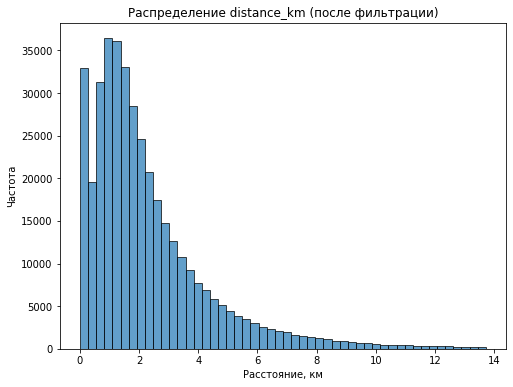

In [21]:
# Выбросы в distance_km
# Создаем копию данных для безопасной работы
distance_data = df['distance_km'].copy()

# Функция для определения верхней границы по 99-му процентилю
def find_outliers(series):
    perc_99 = series.quantile(0.99)
    return perc_99

# Определение верхней границы
upper_limit = find_outliers(distance_data)

# Проверка на наличие выбросов перед фильтрацией
num_outliers = distance_data[distance_data > upper_limit].shape[0]

print(f"Количество выбросов в distance_km: {num_outliers}")
print(f"Верхняя граница (99-й процентиль): {upper_limit:.2f} км")

# Функция для фильтрации выбросов
def filter_outliers(df, upper_limit, distance_column):
    return df[df[distance_column] <= upper_limit]

# Фильтрация выбросов (создаем копию для безопасной работы)
df_filtered_distance = df.copy()
# Фильтрация и вывод статистики
if num_outliers > 0:
    # Фильтруем выбросы
    df_filtered_distance = filter_outliers(df_filtered_distance, upper_limit, 'distance_km')
    
    print("\nОписательные статистики по distance_km (после фильтрации выбросов):")
    print(df_filtered_distance['distance_km'].describe())
else:
    print("Выбросы в distance_km не обнаружены, фильтрация не требуется.")
    print("\nОписательные статистики по distance_km (фильтрация не производилась):")
    print(distance_data.describe())
    
# Дополнительно: гистограмма без экстремальных выбросов для лучшей видимости
plt.figure(figsize=(8, 6))
# Ограничиваем отображение 99-м процентилем для лучшей видимости
data_to_plot = df[df['distance_km'] <= df['distance_km'].quantile(0.99)]['distance_km']
plt.hist(data_to_plot, bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение distance_km (после фильтрации)')
plt.xlabel('Расстояние, км')
plt.ylabel('Частота')
plt.show()

Краткий вывод по результатам фильтрации `distance_km`:

1. Были обнаружены экстремальные выбросы:

- Максимальное расстояние снижено с 56012 км до 13.7 км
- Удалено 3968 записей (1% данных)

2. Кардинальное улучшение качества данных:

- Стандартное отклонение уменьшилось в 68 раз (со 141.86 до 2.09)
- Коэффициент вариации снизился с 3853% до ~91%
- Среднее расстояние стало более реалистичным: 3.68 → 2.30 км

Данные о расстояниях теперь отражают реальные поездки, убраны аномально большие значения, мешавшие анализу.

In [22]:
# Создаем одну копию для всей фильтрации
df_clean = df.copy()

# 1. Фильтрация nominal_price_rub_amt
price_data = df_clean['nominal_price_rub_amt'].copy()
price_upper_limit = price_data.quantile(0.99)
price_outliers = price_data[price_data > price_upper_limit].shape[0]

if price_outliers > 0:
    df_clean = df_clean[df_clean['nominal_price_rub_amt'] <= price_upper_limit]
    print(f"Удалено выбросов в nominal_price_rub_amt: {price_outliers}")

# 2. Фильтрация distance_km
distance_data = df_clean['distance_km'].copy()
distance_upper_limit = distance_data.quantile(0.99)
distance_outliers = distance_data[distance_data > distance_upper_limit].shape[0]

if distance_outliers > 0:
    df_clean = df_clean[df_clean['distance_km'] <= distance_upper_limit]
    print(f"Удалено выбросов в distance_km: {distance_outliers}")


print(f"\nИтоговая статистика:")
print(f"Исходный размер: {len(df)} записей")
print(f"После фильтрации: {len(df_clean)} записей")
print(f"Удалено всего: {len(df) - len(df_clean)} записей ({((len(df) - len(df_clean)) / len(df) * 100):.1f}%)")

Удалено выбросов в nominal_price_rub_amt: 3963
Удалено выбросов в distance_km: 3928

Итоговая статистика:
Исходный размер: 396749 записей
После фильтрации: 388858 записей
Удалено всего: 7891 записей (2.0%)


Для детального анализа создадим дополнительные столбцы.

In [23]:
# Извлечение месяца из даты создания заказа
df_clean['month'] = df_clean['created_dttm'].dt.month

# Извлечение дня недели
df_clean['day_of_week'] = df_clean['created_dttm'].dt.day_name()

# Выходной/будний день
df_clean['is_weekend'] = df_clean['created_dttm'].dt.dayofweek >= 5


# Извлечение часа создания заказа
df_clean['hour'] = df_clean['created_dttm'].dt.hour

# Функция для определения времени суток
def get_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'утро'
    elif 12 <= hour <= 17:
        return 'день'
    elif 18 <= hour <= 23:
        return 'вечер'
    else:
        return 'ночь'
df_clean['time_of_day'] = df_clean['hour'].apply(get_time_of_day)

# Функция для определения сезона
def get_season(month):
    if 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

df_clean['season'] = df_clean['month'].apply(get_season)

# Длительность поездки в минутах
df_clean['ride_duration_min'] = (df_clean['book_end_dttm'] - df_clean['book_start_dttm']).dt.total_seconds() / 60

# Создание категорий по расстоянию
def distance_category(km):
    if km <= 5:
        return 'короткая (до 5 км)'
    elif km <= 10:
        return 'средняя (5-10 км)'
    else:
        return 'длинная (10+ км)'

df_clean['distance_category'] = df_clean['distance_km'].apply(distance_category)

In [24]:
# Проверка
display(df_clean.head())
df_clean.info()
#Проверка периода дат в заказах
print(f"Минимальная дата в заказах: {df_clean['created_dttm'].min()}")
print(f"Максимальная дата в заказах: {df_clean['created_dttm'].max()}")

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,month,day_of_week,is_weekend,hour,time_of_day,season,ride_duration_min,distance_category
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,19.48,0.0,8,Wednesday,False,9,утро,лето,20.500238,короткая (до 5 км)
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,40.30,0.0,10,Thursday,False,14,день,осень,6.913893,короткая (до 5 км)
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,10.79,0.0,9,Thursday,False,5,утро,осень,6.844806,короткая (до 5 км)
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50.0,300.0,...,7.70,0.0,10,Friday,False,16,день,осень,2.309382,короткая (до 5 км)
4,258647149,238473615,M,34,UNKNOWN,UNKNOWN,МОСКВА,6.99,50.0,300.0,...,25.38,0.0,7,Wednesday,False,6,утро,лето,10.090489,короткая (до 5 км)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388858 entries, 0 to 396748
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 388858 non-null  int64         
 1   party_rk                 388858 non-null  int64         
 2   gender_cd                388858 non-null  object        
 3   age                      388858 non-null  int64         
 4   education_level_cd       388858 non-null  object        
 5   marital_status_cd        388858 non-null  object        
 6   lvn_state_nm             388858 non-null  object        
 7   minute_cost              388858 non-null  float64       
 8   activation_cost          388858 non-null  float64       
 9   hold_amount              388858 non-null  float64       
 10  transport_model          388858 non-null  object        
 11  distance_km              388858 non-null  float64       
 12  created_dttm    

**Промежуточные выводы**
1. Размер данных.
После предобработки датафрейм `df_clean` содержит 388858 строк и 28 столбцов. Это означает, что после фильтрации выбросов и обработки дубликатов было удалено значительное количество записей из исходного датасета.
2. Типы данных:
- Столбцы `created_dttm`,`book_start_dttm`,`book_end_dttm`,`local_book_start_dttm` преобразовали в тип datetime64[ns].

Новые столбцы:
- Столбец `ride_duration_min` имеет тип float64.
- Столбец `month`, `hour` имеют тип int64.
- Столбец `day_of_week`,`time_of_day`,`season`,`distance_category` имеют тип object.
3. Пропуски.
Было принятно заменить пропуски на значение-индикатор, чтобы не потерять данные.
4. Дубликаты.
Явных (полных) дубликатов нет, зато есть неявные дубликаты в столбце `lvn_state_nm` 
- Уникальных регионов ДО очистики от дубликатов: 213
- Уникальных регионов ПОСЛЕ: 102
- Сокращение: 111 дубликатов устранено (52.1%)
5. Выбросы.
Выбросы по выручке были обработаны путем фильтрации значений, превышающих 99-й процентиль.

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

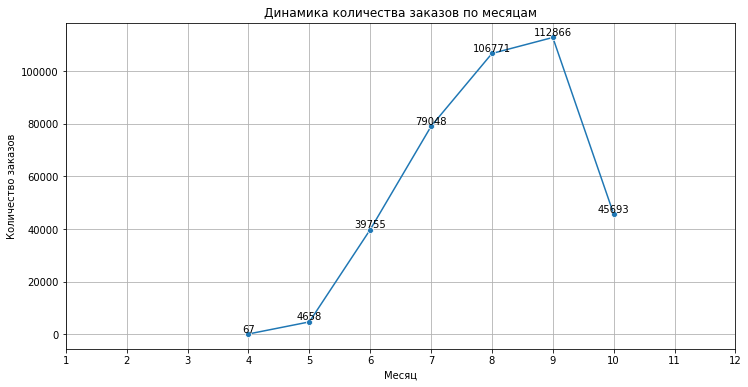

In [25]:
# 1. Количество заказов по месяцам
monthly_orders = df_clean.groupby('month')['order_rk'].count().reset_index()

# Визуализация количества заказов по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='order_rk', data=monthly_orders, marker='o')
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(1, 13))  # Отображаем все месяцы
plt.grid(True)
# Добавляем значения на график
for x, y in zip(monthly_orders['month'], monthly_orders['order_rk']):
    plt.text(x, y, str(y), ha='center', va='bottom')  # Выравниваем текст
plt.show()

**Анализ динамики заказов:**

- Апрель 2024 - запуск сервиса, тестовый режим (67 заказов)

- Май 2024 - резкий рост в 70 раз (4658 заказов), вероятно запуск маркетинга или акций

- Июнь-сентябрь - стабильный рост до 112 тыс. заказов, сервис набрал аудиторию

- Октябрь 2024 - резкое падение на 60% (46 тыс. заказов)

Возможные причины спада:

* Завершение рекламной кампании или акций
* Технические сбои в работе приложения
* Появление сильного конкурента
* Сезонное снижение спроса
* Изменение ценовой политики

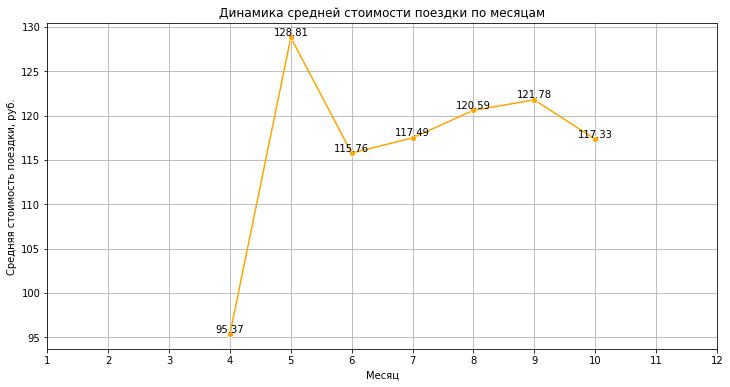

Средняя стоимость поездки по месяцам:
   month  nominal_price_rub_amt
0      4                  95.37
1      5                 128.81
2      6                 115.76
3      7                 117.49
4      8                 120.59
5      9                 121.78
6     10                 117.33


In [26]:
# 2. Расчет средней стоимости поездки по месяцам
monthly_avg_cost = df_clean.groupby('month')['nominal_price_rub_amt'].mean().reset_index()

# Визуализация средней стоимости поездки по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='nominal_price_rub_amt', data=monthly_avg_cost, marker='o', color='orange')
plt.title('Динамика средней стоимости поездки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость поездки, руб.')
plt.xticks(range(1, 13))  # Отображаем все месяцы
plt.grid(True)
# Добавляем значения на график
for x, y in zip(monthly_avg_cost['month'], monthly_avg_cost['nominal_price_rub_amt']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')  # Форматируем до 2 знаков после запятой
plt.show()

# Выводим таблицу с результатами
print("Средняя стоимость поездки по месяцам:")
print(monthly_avg_cost.round(2))

Тренды по сезонам

- Весна (апр-май): резкий рост от минимума к максимуму.
- Лето (июнь-авг): стабильно высокие цены с небольшими колебаниями.
- Осень (сент-окт): постепенное снижение после летнего сезона.

Возможные причины

- Майский пик может быть связан с майскими праздниками и началом летнего сезона.
- Высокие летние цены - традиционный туристический сезон.
- Низкий апрель - межсезонье, меньше спроса.

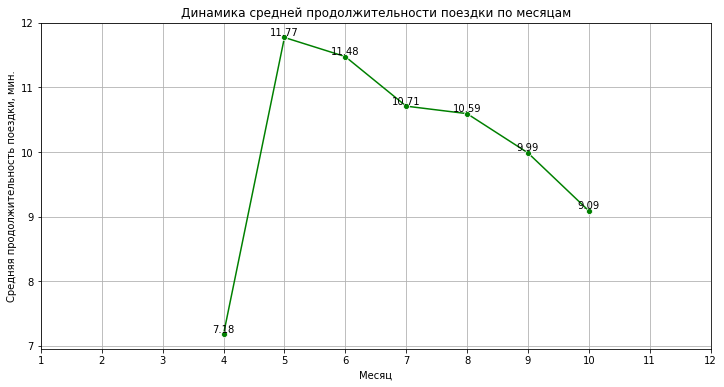

Средняя продолжительность поездки по месяцам:
   month  ride_duration_min
0      4               7.18
1      5              11.77
2      6              11.48
3      7              10.71
4      8              10.59
5      9               9.99
6     10               9.09


In [27]:
# 3. Расчет средней продолжительности поездки по месяцам
monthly_avg_duration = df_clean.groupby('month')['ride_duration_min'].mean().reset_index()

# Визуализация средней продолжительности поездки по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='ride_duration_min', data=monthly_avg_duration, marker='o', color='green')
plt.title('Динамика средней продолжительности поездки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность поездки, мин.')
plt.xticks(range(1, 13))  # Отображаем все месяцы
plt.grid(True)
# Добавляем значения на график
for x, y in zip(monthly_avg_duration['month'], monthly_avg_duration['ride_duration_min']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')  # Форматируем до 2 знаков после запятой
plt.show()

# Выводим таблицу с результатами
print("Средняя продолжительность поездки по месяцам:")
print(monthly_avg_duration.round(2))

Сезонные паттерны

- Весна (апр-май): резкий переход от минимальных к максимальным значениям
- Лето (июнь-авг): высокий сезон с постепенным снижением
- Осень (сент-окт): продолжение нисходящего тренда

Возможные причины

- Летом люди чаще ездят на дальние расстояния (парки, дачи, отдых)
- Весной преобладают короткие городские поездки
- Туристический сезон влияет на среднюю продолжительность

Наблюдается сильная сезонная зависимость - летом поездки значительно длиннее, чем весной и осенью, что коррелирует с динамикой стоимости.

In [28]:
# 4. Сравнение распределения заказов по категориям (весна vs лето vs осень)

# Определение сезонов
spring_months = [4, 5]
summer_months = [6, 7, 8]
autumn_months = [9, 10]

df_spring = df_clean[df_clean['month'].isin(spring_months)]
df_summer = df_clean[df_clean['month'].isin(summer_months)]
df_autumn = df_clean[df_clean['month'].isin(autumn_months)]

# Функция для расчета долей заказов по категориям
def calculate_category_proportions(df, category):
    # Исключаем UNKNOWN из анализа
    filtered_df = df[df[category] != 'UNKNOWN']
    category_counts = filtered_df[category].value_counts(normalize=True).reset_index()
    category_counts.columns = [category, 'proportion']
    return category_counts

# Расчет долей для уровня образования 
education_level_proportions_spring = calculate_category_proportions(df_spring, 'education_level_cd')
education_level_proportions_summer = calculate_category_proportions(df_summer, 'education_level_cd')
education_level_proportions_autumn = calculate_category_proportions(df_autumn, 'education_level_cd')

# Расчет долей для типа семейного статуса
marital_status_proportions_spring = calculate_category_proportions(df_spring, 'marital_status_cd')
marital_status_proportions_summer = calculate_category_proportions(df_summer, 'marital_status_cd')
marital_status_proportions_autumn = calculate_category_proportions(df_autumn, 'marital_status_cd')

# Расчет долей в зависимости от категории расстояния
distance_category_proportions_spring = calculate_category_proportions(df_spring, 'distance_category')
distance_category_proportions_summer = calculate_category_proportions(df_summer, 'distance_category')
distance_category_proportions_autumn = calculate_category_proportions(df_autumn, 'distance_category')

# Функция для визуализации распределения трех сезонов
def visualize_three_seasons_category_distribution(spring_data, summer_data, autumn_data, category, title):
    # Добавляем столбец 'season' для различения
    spring_data['season'] = 'Весна'
    summer_data['season'] = 'Лето'
    autumn_data['season'] = 'Осень'

    # Объединяем данные
    combined_data = pd.concat([spring_data, summer_data, autumn_data])

    plt.figure(figsize=(14, 4))
    ax = sns.barplot(x=category, y='proportion', hue='season', data=combined_data)
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel('Доля заказов')
    plt.xticks(rotation=0)
    plt.legend(title='Сезон')

    # Добавляем значения на столбцы
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

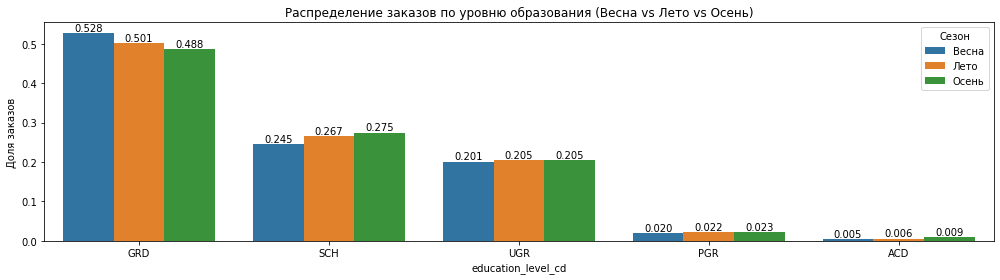

In [29]:
# Визуализация распределения по уровню образования для трех сезонов
visualize_three_seasons_category_distribution(education_level_proportions_spring, 
                                              education_level_proportions_summer,
                                              education_level_proportions_autumn,
                                              'education_level_cd', 
                                              'Распределение заказов по уровню образования (Весна vs Лето vs Осень)')

Было выяснено, что за анализируемый период наибольшую популярность сервис вызвал у людей с высшем образованием - около 50% в каждом сезоне. По ~ 20% пользователей с начальном/среднем и неполным высшем. А вот наимее популярным сервис оказался у людей с двумя и выше образованиями (около 2%) и у людей с ученной степенью (меньше 1%).

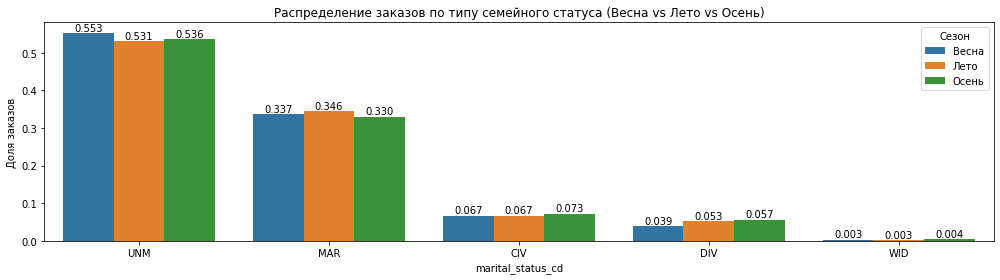

In [30]:
# Визуализация распределения по типу семейного статуса для трех сезонов
visualize_three_seasons_category_distribution(marital_status_proportions_spring, 
                                              marital_status_proportions_summer,
                                              marital_status_proportions_autumn,
                                              'marital_status_cd', 
                                              'Распределение заказов по типу семейного статуса (Весна vs Лето vs Осень)')

Сервис "Самокаты" наиболее популярен у холостых не зависимо от сезона года (около 53-55%), вторыми по частоте пользования являются люди, состоящие в браке (~ 34%). Меньше 20% пользователей: в гражданском браке (6-7%), разведены(4-6%). А вот наимее популярным сервис оказался у людей, которые отметили что они вдовцы (менее 1%).

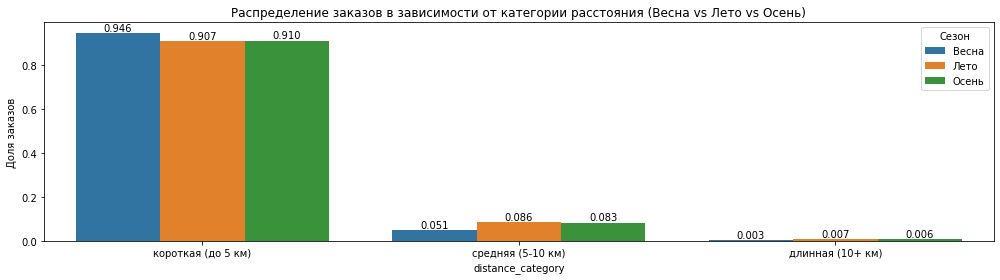

In [31]:
# Визуализация распределения по типу семейного статуса для трех сезонов
visualize_three_seasons_category_distribution(distance_category_proportions_spring, 
                                              distance_category_proportions_summer,
                                              distance_category_proportions_autumn,
                                              'distance_category', 
                                              'Распределение заказов в зависимости от категории расстояния (Весна vs Лето vs Осень)')

Как было выявленно ранее, пользователи выбирают короткие расстояние вне зависимости от сезона, однако стоит отметить что именно в летний сезон чаще встречаются длинные поездки. Этому могут способствовать как погодные, так и внешние причины (например туризм).

**Промежуточный вывод:**

Анализ сервиса "Самокаты" выявил ярко выраженную сезонную бизнес-модель с критической зависимостью от летнего спроса. После успешного запуска в апреле (67 заказов) сервис показал взрывной рост в мае - увеличение в 70 раз до 4658 заказов, достигнув пика в 112 тысяч заказов к сентябрю. Однако октябрьское падение на 60% обнажило уязвимость модели.

Ключевой инсайт - синхронность динамики стоимости и продолжительности поездок. Летом пользователи платят больше за длительные поездки (11+ минут), тогда как весной и осенью преобладают короткие маршруты (7-9 минут). Это указывает на сезонное изменение паттернов использования: от утилитарных городских поездок к туристическим и рекреационным.

Портрет лояльной аудитории стабилен для любых сезонов: 50+% пользователей с высшим образованием и 53-55% холостых. Низкое проникновение в аудитории с учеными степенями (<1%) открывает потенциал для роста.

###  Осенняя активность пользователей

Было выяснено, что осенью интересная обстановка с активностью пользователй. Пик всех заказов за весь период анализа случился в сентябре (112 тыс), а в октябре случился резкий спад до 4658. В этом случае стоит детально проанализировать активность пользователей в осенний сезон.

In [32]:
# Создадим df_autumn, содержащий данные только за осень (сентябрь и октябрь)
autumn_months = [9, 10]
df_autumn = df_clean[df_clean['month'].isin(autumn_months)].copy()

In [33]:
# 1. Динамика изменений по дням

# Группировка по дате, расчет общего числа заказов и числа уникальных пользователей
daily_activity = df_autumn.groupby(df_autumn['created_dttm'].dt.date).agg(
    {'order_rk': 'count', 'party_rk': pd.Series.nunique, 'nominal_price_rub_amt': 'mean'}
).reset_index()
daily_activity.rename(columns={'created_dttm': 'date',
                               'order_rk': 'total_orders',
                               'party_rk': 'dau',
                               'nominal_price_rub_amt': 'avg_nominal_price'}, inplace=True)


# Расчет среднего числа заказов на одного пользователя
daily_activity['avg_orders_per_user'] = daily_activity['total_orders'] / daily_activity['dau']

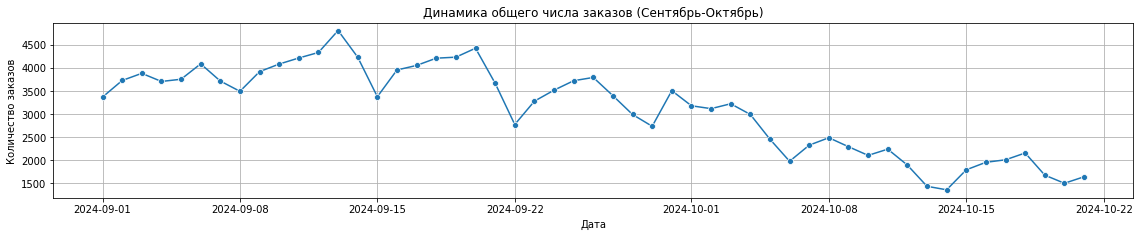

In [34]:
# Динамика общего числа заказов
plt.figure(figsize=(16, 12))
plt.subplot(4, 1, 1)
sns.lineplot(x='date', y='total_orders', data=daily_activity, marker='o')
plt.title('Динамика общего числа заказов (Сентябрь-Октябрь)')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
plt.show()

График демонстрирует постепенный спад количества заказов в течение сентября и октября, с несколькими незначительными колебаниями. 
Общий тренд – снижение числа заказов в осенние месяцы, что подтверждает сезонный рост, ранее замеченный в данных.

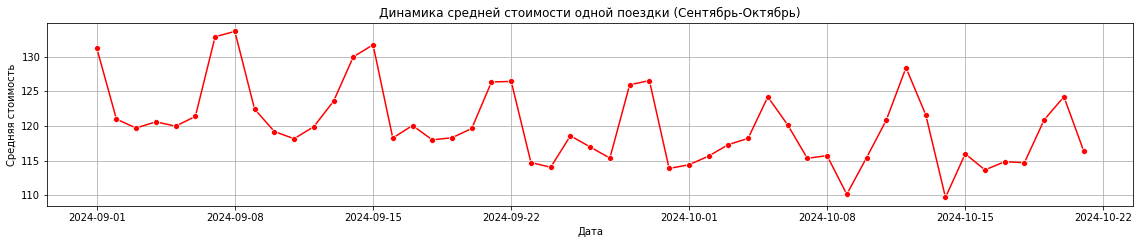

In [35]:
# Динамика средней стоимости одной поездки
plt.figure(figsize=(16, 12))
plt.subplot(4, 1, 4)
sns.lineplot(x='date', y='avg_nominal_price', data=daily_activity, marker='o', color='red')
plt.title('Динамика средней стоимости одной поездки (Сентябрь-Октябрь)')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость')
plt.grid(True)
plt.tight_layout()
plt.show()

Средняя стоимость одной поездки имеет тенденцию к снижению в течение сентября- октября. 
В целом, на графике видны выраженные колебания средней стоимости поездки в течение периода, что может быть связано с различными факторами, такими как изменение скидочных акций, выходные и прочее.

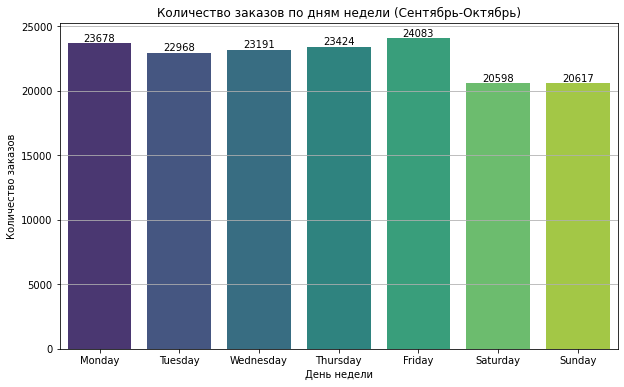

In [36]:
# 2. Недельная цикличность

# Группировка по дню недели и расчет количества заказов
weekday_activity = df_autumn.groupby('day_of_week')['order_rk'].count().reset_index()
weekday_activity.rename(columns={'order_rk': 'total_orders'}, inplace=True)

# Визуализация недельной цикличности
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='day_of_week', y='total_orders', data=weekday_activity, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.title('Количество заказов по дням недели (Сентябрь-Октябрь)')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Выяснилось, что самый популярный день использования сервисом это пятница. А наименьшим спросом пользуются в выходные дни. Скорее всего это связано с рабочими днями. 

In [37]:
# Анализ выходных дней
# Группируем по выходному/буднему дню и считаем заказы, пользователей, среднее количество заказов на пользователя и среднюю стоимость билета.
weekend_vs_weekday = df_autumn.groupby('is_weekend').agg(
    {'order_rk': 'count', 'party_rk': pd.Series.nunique, 'nominal_price_rub_amt': 'mean'}
).reset_index()
weekend_vs_weekday.rename(columns={'order_rk': 'total_orders',
                                   'party_rk': 'unique_users',
                                   'nominal_price_rub_amt': 'nominal_price_price'}, inplace=True)
weekend_vs_weekday['avg_orders_per_user'] = weekend_vs_weekday['total_orders'] / weekend_vs_weekday['unique_users']

# Выводим таблицу с результатами
print("\nСравнение активности в будни и выходные:")
display(weekend_vs_weekday)


Сравнение активности в будни и выходные:


,is_weekend,total_orders,unique_users,nominal_price_price,avg_orders_per_user
0,False,117344,26689,117.867758,4.396718
1,True,41215,16583,127.967943,2.485377


В будние дни наблюдается значительно больше заказов (117344) и активных пользователей (26689), чем в выходные (41215 заказов, 16583 пользователей). Средняя стоимость поездки в выходные выше (128), чем в будни (118) - это доказывает колебания в графике динамики средней стоимости одной поездки.
Однако среднее количество заказов на одного пользователя в будни заметно выше (4.4), чем в выходные (2.5). Это говорит о том, что будние дни характеризуются большей общей активностью и лучшей конверсией.

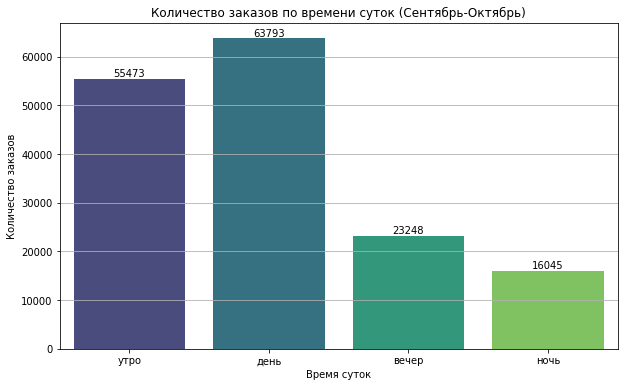

In [38]:
# 3. От времени суток

# Группировка по времени суток и расчет количества заказов
time_of_day_activity = df_autumn.groupby('time_of_day')['order_rk'].count().reset_index()
time_of_day_activity.rename(columns={'order_rk': 'total_orders'}, inplace=True)

# Определяем правильный порядок времени суток для сортировки
time_order = ['утро', 'день', 'вечер', 'ночь'] 

# Визуализация активности по времени суток
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='time_of_day', y='total_orders', data=time_of_day_activity, 
                 order=time_order, palette="viridis")
plt.title('Количество заказов по времени суток (Сентябрь-Октябрь)')
plt.xlabel('Время суток')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Пик активности сервиса приходится на дневное время - 63 793 заказа, что составляет почти половину всего объема. Утренние часы также показывают высокую активность - 55 473 заказа, формируя выраженный "рабочий" паттерн использования.

Вечернее время демонстрирует умеренный спрос (23 248 заказов), в то время как ночные поездки наименее популярны - всего 16 045 заказов.

**Промежуточный вывод:**

Анализ осенней активности сервиса выявил устойчивый спад количества заказов в сентябре-октябре, подтверждающий сезонный характер спроса. Параллельно наблюдается снижение средней стоимости поездок, хотя с заметными колебаниями, вероятно связанными с акционными кампаниями и выходными днями.

Ядро пользовательской активности формируется вокруг рабочих будних дней: пятница демонстрирует пиковый спрос, тогда как выходные показывают значительное снижение заказов. Это подтверждается существенным преобладанием будней над выходными по объему заказов (117 344 против 41 215) и количеству активных пользователей (26 689 против 16 583).

Суточная динамика усиливает картину деловой мобильности: дневное время лидирует с 63 793 заказами, утренние часы следуют с 55 473 поездками, формируя четкий "рабочий" паттерн использования сервиса. Вечерние и ночные периоды значительно уступают в популярности.

Экономические показатели демонстрируют интересный парадокс: несмотря на меньший объем заказов в выходные, средняя стоимость поездки в эти дни выше (128 руб. против 118 руб. в будни). При этом конверсия пользователей в будни почти вдвое выше (4,4 заказа на пользователя против 2,5 в выходные), что указывает на более интенсивное использование сервиса в рабочие дни.

## Статистический анализ данных и формулировка гипотез

**Гипотеза 1: Оптимизация тарифной политики для разного времени суток**

Формулировка гипотезы: Пользователи совершают статистически значимо больше поездок в утренние и дневные часы при текущей стоимости, что подтверждает потенциал для динамического ценообразования.

- Нулевая гипотеза H₀: Среднее количество заказов в утренние/дневные часы не отличается от вечерних/ночных
- Альтернативная гипотеза H₁: Среднее количество заказов в утренние/дневные часы статистически значимо выше

In [39]:
# Фильтрация данных по времени суток
peak_hours_data = df_autumn[df_autumn['time_of_day'].isin(['утро', 'день'])]['order_rk']
off_peak_data = df_autumn[df_autumn['time_of_day'].isin(['вечер', 'ночь'])]['order_rk']

# Проверка на нормальность распределения (тест Шапиро-Уилка)
shapiro_peak = stats.shapiro(peak_hours_data)
shapiro_off_peak = stats.shapiro(off_peak_data)

print("Тест Шапиро-Уилка (пиковые часы):", shapiro_peak)
print("Тест Шапиро-Уилка (непиковые часы):", shapiro_off_peak)

# Выбор теста: t-тест или U-тест Манна-Уитни
if shapiro_peak.pvalue > 0.05 and shapiro_off_peak.pvalue > 0.05:
    # Если оба распределения нормальны, используем t-тест
    t_statistic, p_value = stats.ttest_ind(peak_hours_data, off_peak_data, alternative='greater')
    print("\nПроведен t-тест:")
    test_statistic = t_statistic
else:
    # Если хотя бы одно распределение ненормально, используем U-тест Манна-Уитни
    u_statistic, p_value = stats.mannwhitneyu(peak_hours_data, off_peak_data, alternative='greater')
    print("\nПроведен U-тест Манна-Уитни:")
    test_statistic = u_statistic

print(f"Статистика: {test_statistic}")
print(f"p-значение: {p_value}")
alpha = 0.05
print(f"Уровень значимости (альфа): {alpha}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Количество заказов в пиковые часы статистически значимо выше, что подтверждает потенциал для дифференцированного ценообразования.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в количестве заказов между пиковыми и непиковыми часами.")

Тест Шапиро-Уилка (пиковые часы): ShapiroResult(statistic=0.7163602113723755, pvalue=0.0)
Тест Шапиро-Уилка (непиковые часы): ShapiroResult(statistic=0.7178693413734436, pvalue=0.0)

Проведен U-тест Манна-Уитни:
Статистика: 2332442268.0
p-значение: 0.9133922348637289
Уровень значимости (альфа): 0.05
Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в количестве заказов между пиковыми и непиковыми часами.


Так как значение p-value = 0.91, это означает что нет статистически значимой разницы в количестве заказов между пиковыми и непиковыми часами.Пользователи равномерно распределяют свои поездки в течение суток.

Гипотеза не подтвердилась - нельзя сказать, что в пиковые часы заказов "статистически значимо больше".

**Гипотеза 2: Оптимизация распределения самокатов по районам**

- Нулевая гипотеза H₀: Средняя плотность заказов в топ-районах не отличается от средней плотности заказов в остальных районах.

- Альтернативная гипотеза H₁: Средняя плотность заказов в топ-районах статистически значимо выше, чем в остальных районах.

In [40]:
# Анализ плотности заказов по районам для оптимизации распределения самокатов

# Фильтруем данные, исключая 'UNKNOWN'
df_filtered = df_autumn[df_autumn['lvn_state_nm'] != 'UNKNOWN']

# Рассчитываем плотность заказов по районам
region_density = df_filtered.groupby('lvn_state_nm')['order_rk'].count()

# Определяем топ-районы (верхние 25%) и остальные районы
threshold = region_density.quantile(0.75)
top_regions = region_density[region_density >= threshold].index
other_regions = region_density[region_density < threshold].index

print(f"Топ-районы (порог: {threshold:.0f} заказов): {list(top_regions)}")

# Создаем данные для сравнения
top_regions_data = df_filtered[df_filtered['lvn_state_nm'].isin(top_regions)]['order_rk']
other_regions_data = df_filtered[df_filtered['lvn_state_nm'].isin(other_regions)]['order_rk']

print(f"\nКоличество заказов в топ-районах: {len(top_regions_data)}")
print(f"Количество заказов в остальных районах: {len(other_regions_data)}")

# Проверка на нормальность распределения (тест Шапиро-Уилка)
shapiro_top = stats.shapiro(top_regions_data)
shapiro_other = stats.shapiro(other_regions_data)

print("Тест Шапиро-Уилка (топ-районы):", shapiro_top)
print("Тест Шапиро-Уилка (остальные районы):", shapiro_other)

# Выбор теста: t-тест или U-тест Манна-Уитни
if shapiro_top.pvalue > 0.05 and shapiro_other.pvalue > 0.05:
    t_statistic, p_value = stats.ttest_ind(top_regions_data, other_regions_data, alternative='greater')
    print("\nПроведен t-тест:")
    test_statistic = t_statistic
else:
    u_statistic, p_value = stats.mannwhitneyu(top_regions_data, other_regions_data, alternative='greater')
    print("\nПроведен U-тест Манна-Уитни:")
    test_statistic = u_statistic

print(f"Статистика: {test_statistic}")
print(f"p-значение: {p_value}")
alpha = 0.05
print(f"Уровень значимости (альфа): {alpha}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Плотность заказов в топ-районах статистически значимо выше, что подтверждает необходимость оптимизации распределения самокатов.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в плотности заказов между топ-районами и остальными районами.")

Топ-районы (порог: 661 заказов): ['ВОЛГОГРАДСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ', 'КАЛИНИНГРАДСКАЯ ОБЛ', 'КИРОВСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ', 'КРАСНОЯРСКИЙ КРАЙ', 'ЛЕНИНГРАДСКАЯ ОБЛ', 'МОСКВА', 'МОСКОВСКАЯ ОБЛ', 'НИЖЕГОРОДСКАЯ ОБЛ', 'НОВОСИБИРСКАЯ ОБЛ', 'ПЕРМСКИЙ КРАЙ', 'РЕСП БАШКОРТОСТАН', 'РЕСП ТАТАРСТАН', 'РОСТОВСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛ', 'САНКТ-ПЕТЕРБУРГ', 'САРАТОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ', 'ТОМСКАЯ ОБЛ', 'ТЮМЕНСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП', 'ЧЕЛЯБИНСКАЯ ОБЛ']

Количество заказов в топ-районах: 126898
Количество заказов в остальных районах: 15697
Тест Шапиро-Уилка (топ-районы): ShapiroResult(statistic=0.7162554264068604, pvalue=0.0)
Тест Шапиро-Уилка (остальные районы): ShapiroResult(statistic=0.7321441173553467, pvalue=0.0)

Проведен U-тест Манна-Уитни:
Статистика: 1046149633.0
p-значение: 2.9732931504378236e-25
Уровень значимости (альфа): 0.05
Отвергаем нулевую гипотезу. Плотность заказов в топ-районах статистически значимо выше, что подтверждает необходимость 

Гипотеза подтверждена - существует статистически значимая разница в плотности заказов между топ-районами и остальными районами (p-value = 2.97e-25). Также:

- Сильный дисбаланс спроса: В топ-районах сосредоточено 126 898 заказов против 15 697 в остальных (в 8 раз больше).
- Высокая концентрация спроса: Небольшое количество районов генерирует основной объем заказов.
- Потенциал оптимизации: Перераспределение самокатов в топ-районы может значительно улучшить доступность сервиса.

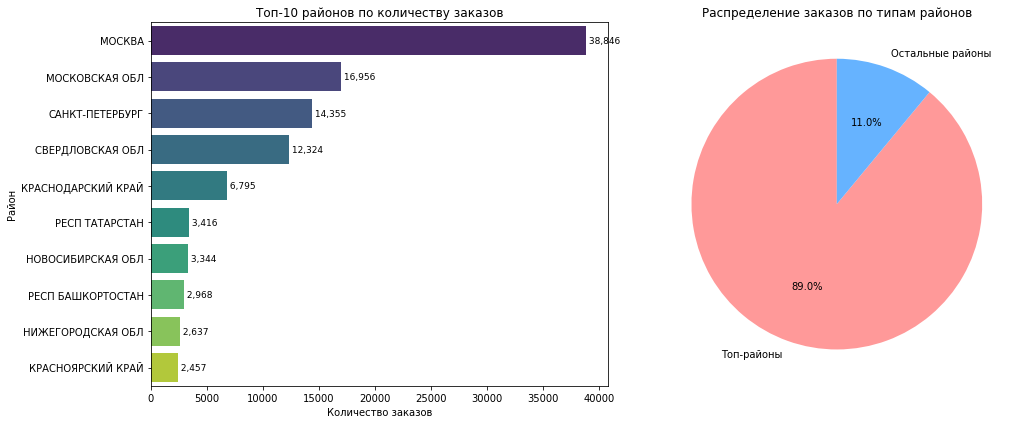

In [41]:
# Визуализация распределения заказов по районам
plt.figure(figsize=(15, 6))

# График 1: Топ-10 районов по количеству заказов
plt.subplot(1, 2, 1)
top_10_regions = region_density.nlargest(10)
sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette='viridis')
plt.title('Топ-10 районов по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Район')

# Добавление значений на столбцы
for i, value in enumerate(top_10_regions.values):
    plt.text(value, i, f' {value:,}', va='center', fontsize=9)

# График 2: Распределение заказов по типам районов
plt.subplot(1, 2, 2)
categories = ['Топ-районы', 'Остальные районы']
values = [len(top_regions_data), len(other_regions_data)]
colors = ['#ff9999', '#66b3ff']
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Распределение заказов по типам районов')

plt.tight_layout()
plt.show()

Данная гипотеза является перспективной, поскольку статистический анализ выявил чрезвычайно сильную концентрацию спроса в ограниченном числе районов. Разница в количестве заказов между топовыми и остальными районами превышает 8 раз, что указывает на значительный дисбаланс в распределении спроса и предложения. Оптимизация распределения самокатов позволит сократить время ожидания в наиболее востребованных локациях, где сосредоточено 89% всех заказов. Это напрямую повысит удовлетворенность пользователей и конверсию в заказы. При этом перераспределение парка не требует дополнительных инвестиций в инфраструктуру, а лишь оптимизирует существующие ресурсы.

## Доля Т-банка в рынке кикшеринга

Источник для анализа рынка: https://truesharing.ru/tp/54173/?ysclid=mhuw13u96s568278725

In [42]:
# Анализ данных Т-банка
print("1.Анализ данных сервиса Самокаты от Т-банка")

# Основные метрики из датафрейма
total_orders = len(df_clean)
total_revenue = df_clean['nominal_price_rub_amt'].sum()
unique_users = df_clean['party_rk'].nunique()
avg_ride_duration = df_clean['ride_duration_min'].mean()
avg_distance = df_clean['distance_km'].mean()
unique_scooters = df_clean['transport_model'].nunique()  # Примерное количество моделей

print(f"Общее количество поездок: {total_orders:}")
print(f"Общая выручка: {total_revenue:.0f} руб")
print(f"Уникальные пользователи: {unique_users:}")
print(f"Средняя продолжительность поездки: {avg_ride_duration:.1f} мин")
print(f"Средняя дистанция поездки: {avg_distance:.1f} км")
print(f"Количество уникальных моделей самокатов: {unique_scooters}")

# Анализ по пользователям
user_activity = df_clean.groupby('party_rk').agg({
    'order_rk': 'count',
    'nominal_price_rub_amt': 'sum',
    'ride_duration_min': 'mean',
    'distance_km': 'mean'
}).rename(columns={'order_rk': 'trips_per_user', 'nominal_price_rub_amt': 'revenue_per_user'})

avg_trips_per_user = user_activity['trips_per_user'].mean()
avg_revenue_per_user = user_activity['revenue_per_user'].mean()

print(f"\nСреднее количество поездок на пользователя: {avg_trips_per_user:.1f}")
print(f"Средняя выручка на пользователя: {avg_revenue_per_user:.0f} руб")

# Анализ по сезонам
if 'season' in df_clean.columns:
    seasonal_analysis = df_clean.groupby('season').agg({
        'order_rk': 'count',
        'nominal_price_rub_amt': 'sum'
    })
    print(f"\nРаспределение по сезонам:")
    print(seasonal_analysis)

1.Анализ данных сервиса Самокаты от Т-банка
Общее количество поездок: 388858
Общая выручка: 46475982 руб
Уникальные пользователи: 62117
Средняя продолжительность поездки: 10.4 мин
Средняя дистанция поездки: 2.2 км
Количество уникальных моделей самокатов: 14

Среднее количество поездок на пользователя: 6.3
Средняя выручка на пользователя: 748 руб

Распределение по сезонам:
        order_rk  nominal_price_rub_amt
season                                 
весна       4725           6.063886e+05
лето      225574           2.676432e+07
осень     158559           1.910527e+07


In [43]:
print("2.Сравнение с рыночными показателями за 2024г.:")

# Рыночные показатели с картинки
market_2024 = {
    'total_trips': 231600000,  # 231.6 млн поездок
    'total_revenue': 31200000000,  # 31.2 млрд руб
    'total_users': 25300000,  # 25.3 млн пользователей
    'avg_duration': 12.0,  # 12 минут
    'avg_distance': 2.2,  # 2.2 км
    'trips_per_user': 11.1,  # 11.1 поездок на пользователя
    'revenue_per_user': 1230,  # 1,230 руб
    'fleet_size': 401000  # 401 тыс. самокатов
}

# Расчет доли данных Т-банка на рынке
your_share = {
    'trips_share': (total_orders / market_2024['total_trips']) * 100,
    'revenue_share': (total_revenue / market_2024['total_revenue']) * 100,
    'users_share': (unique_users / market_2024['total_users']) * 100
}

print("\nДоля Т-банка на рынке:")
print(f"Поездки: {your_share['trips_share']:.4f}%")
print(f"Выручка: {your_share['revenue_share']:.4f}%")
print(f"Пользователи: {your_share['users_share']:.4f}%")

print(f"\nСравнение показателей:")
comparison_data = {
    'Показатель': ['Средняя продолжительность', 'Средняя дистанция', 'Поездок на пользователя', 'Выручка на пользователя'],
    'Т-банк': [avg_ride_duration, avg_distance, avg_trips_per_user, avg_revenue_per_user],
    'Рынок 2024': [market_2024['avg_duration'], market_2024['avg_distance'], market_2024['trips_per_user'], market_2024['revenue_per_user']],
    'Разница': [
        avg_ride_duration - market_2024['avg_duration'],
        avg_distance - market_2024['avg_distance'],
        avg_trips_per_user - market_2024['trips_per_user'],
        avg_revenue_per_user - market_2024['revenue_per_user']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

2.Сравнение с рыночными показателями за 2024г.:

Доля Т-банка на рынке:
Поездки: 0.1679%
Выручка: 0.1490%
Пользователи: 0.2455%

Сравнение показателей:
                  Показатель      Т-банк  Рынок 2024     Разница
0  Средняя продолжительность   10.368512        12.0   -1.631488
1          Средняя дистанция    2.235623         2.2    0.035623
2    Поездок на пользователя    6.260090        11.1   -4.839910
3    Выручка на пользователя  748.200690      1230.0 -481.799310


In [44]:
# Анализ конкурентной позиции

# Данные из анализа
metrics = ['Средняя продолжительность', 'Средняя дистанция', 'Поездок на пользователя', 'Выручка на пользователя']
tbank_values = [avg_ride_duration, avg_distance, avg_trips_per_user, avg_revenue_per_user]
market_values = [market_2024['avg_duration'], market_2024['avg_distance'], market_2024['trips_per_user'], market_2024['revenue_per_user']]

# Рассчитываем процентное соотношение (Т-Банк / Рынок * 100%)
percentage_ratio = [(tbank / market) * 100 for tbank, market in zip(tbank_values, market_values)]

print("\n3.Анализ конкурентной позиции Т-банка:")
competitive_analysis = []
for i, metric in enumerate(metrics):
    ratio = percentage_ratio[i]
    if ratio > 110:
        position = "ЛИДИРУЮЩАЯ"
        assessment = "Значительно выше рынка"
    elif ratio > 100:
        position = "ВЫШЕ СРЕДНЕГО" 
        assessment = "Выше рыночного уровня"
    elif ratio > 90:
        position = "СООТВЕТСТВУЕТ РЫНКУ"
        assessment = "На уровне рынка"
    elif ratio > 80:
        position = "НИЖЕ СРЕДНЕГО"
        assessment = "Незначительно ниже рынка"
    else:
        position = "ОТСТАЮЩАЯ"
        assessment = "Требует улучшения"
    
    competitive_analysis.append({
        'Метрика': metric,
        'Соотношение': f"{ratio:.1f}%",
        'Позиция': position,
        'Оценка': assessment
    })

competitive_df = pd.DataFrame(competitive_analysis)
print(competitive_df.to_string(index=False))

print(f"\nОбщий вывод:")
strong_metrics = sum(1 for ratio in percentage_ratio if ratio > 100)
total_metrics = len(percentage_ratio)

if strong_metrics == total_metrics:
    print("Т-Банк демонстрирует показатели ВЫШЕ рыночных по всем метрикам")
elif strong_metrics >= total_metrics / 2:
    print("Т-Банк показывает СМЕШАННЫЕ результаты с преобладанием сильных сторон")
else:
    print("Т-Банк ОТСТАЕТ от рыночных показателей по большинству метрик")


3.Анализ конкурентной позиции Т-банка:
                  Метрика Соотношение       Позиция                   Оценка
Средняя продолжительность       86.4% НИЖЕ СРЕДНЕГО Незначительно ниже рынка
        Средняя дистанция      101.6% ВЫШЕ СРЕДНЕГО    Выше рыночного уровня
  Поездок на пользователя       56.4%     ОТСТАЮЩАЯ        Требует улучшения
  Выручка на пользователя       60.8%     ОТСТАЮЩАЯ        Требует улучшения

Общий вывод:
Т-Банк ОТСТАЕТ от рыночных показателей по большинству метрик


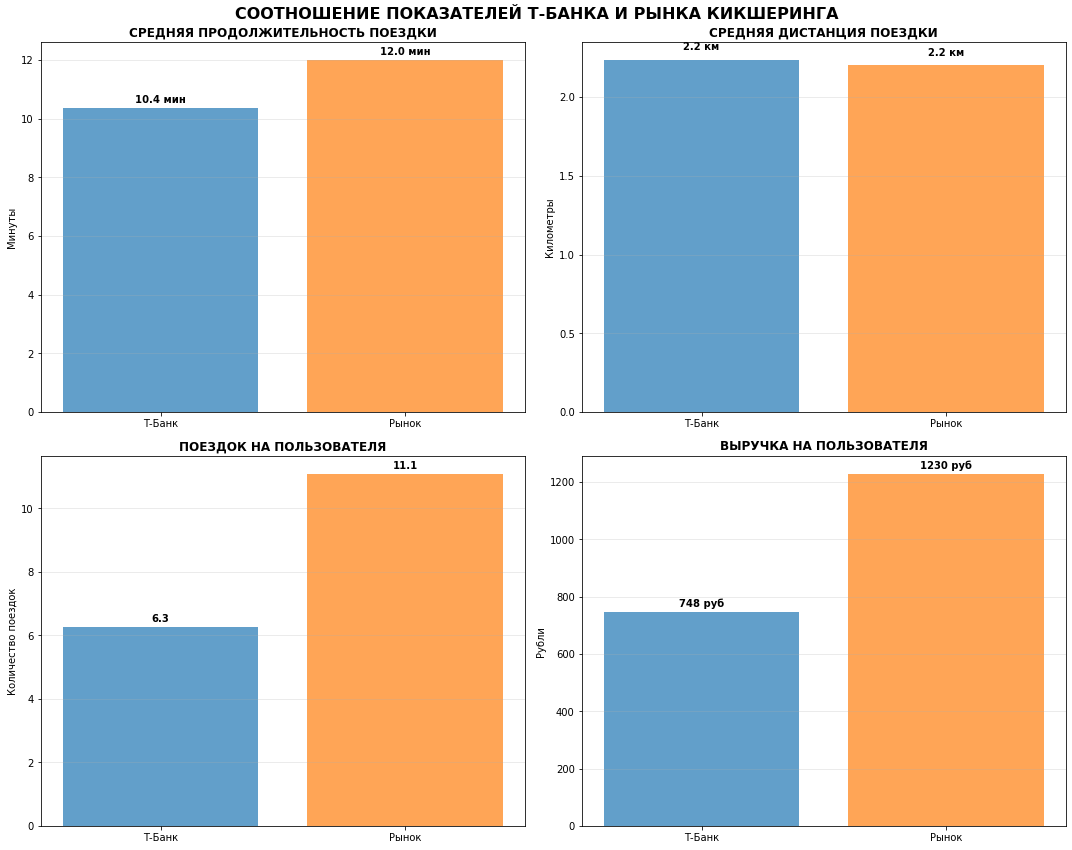

In [45]:
# Визуализация 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('СООТНОШЕНИЕ ПОКАЗАТЕЛЕЙ Т-БАНКА И РЫНКА КИКШЕРИНГА', fontsize=16, fontweight='bold')

# График 1: Средняя продолжительность поездки
axes[0, 0].bar(['Т-Банк', 'Рынок'], [tbank_values[0], market_values[0]], 
               color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[0, 0].set_title('СРЕДНЯЯ ПРОДОЛЖИТЕЛЬНОСТЬ ПОЕЗДКИ', fontweight='bold')
axes[0, 0].set_ylabel('Минуты')
axes[0, 0].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
axes[0, 0].text(0, tbank_values[0] + 0.1, f'{tbank_values[0]:.1f} мин', 
                ha='center', va='bottom', fontweight='bold')
axes[0, 0].text(1, market_values[0] + 0.1, f'{market_values[0]:.1f} мин', 
                ha='center', va='bottom', fontweight='bold')

# График 2: Средняя дистанция поездки
axes[0, 1].bar(['Т-Банк', 'Рынок'], [tbank_values[1], market_values[1]], 
               color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[0, 1].set_title('СРЕДНЯЯ ДИСТАНЦИЯ ПОЕЗДКИ', fontweight='bold')
axes[0, 1].set_ylabel('Километры')
axes[0, 1].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
axes[0, 1].text(0, tbank_values[1] + 0.05, f'{tbank_values[1]:.1f} км', 
                ha='center', va='bottom', fontweight='bold')
axes[0, 1].text(1, market_values[1] + 0.05, f'{market_values[1]:.1f} км', 
                ha='center', va='bottom', fontweight='bold')

# График 3: Поездок на пользователя
axes[1, 0].bar(['Т-Банк', 'Рынок'], [tbank_values[2], market_values[2]], 
               color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[1, 0].set_title('ПОЕЗДОК НА ПОЛЬЗОВАТЕЛЯ', fontweight='bold')
axes[1, 0].set_ylabel('Количество поездок')
axes[1, 0].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
axes[1, 0].text(0, tbank_values[2] + 0.1, f'{tbank_values[2]:.1f}', 
                ha='center', va='bottom', fontweight='bold')
axes[1, 0].text(1, market_values[2] + 0.1, f'{market_values[2]:.1f}', 
                ha='center', va='bottom', fontweight='bold')

# График 4: Выручка на пользователя
axes[1, 1].bar(['Т-Банк', 'Рынок'], [tbank_values[3], market_values[3]], 
               color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[1, 1].set_title('ВЫРУЧКА НА ПОЛЬЗОВАТЕЛЯ', fontweight='bold')
axes[1, 1].set_ylabel('Рубли')
axes[1, 1].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
axes[1, 1].text(0, tbank_values[3] + 10, f'{tbank_values[3]:.0f} руб', 
                ha='center', va='bottom', fontweight='bold')
axes[1, 1].text(1, market_values[3] + 10, f'{market_values[3]:.0f} руб', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Вывод:**

Немедленные действия должны быть сосредоточены на увеличении частоты использования. Внедрение программы лояльности с прогрессивными бонусами за повторные поездки может стать решающим фактором. Рассмотрите модель подписки, которая стимулирует регулярное использование сервиса без необходимости каждый раз принимать решение о покупке.

Долгосрочная стратегия должна включать создание экосистемы сервиса, где кикшеринг становится частью повседневной мобильности пользователя. Интеграция с другими транспортными услугами и партнерские программы с городскими сервисами укрепят позиции Т-Банка как комплексного решения городской мобильности.

Преодоление разрыва в лояльности пользователей — ключ к превращению операционно успешного сервиса в финансово эффективный бизнес.